**Алексей, привет!**

Меня зовут Соколова Александра, я буду проверять твой проект. Приятно познакомиться:)
    
Предлагаю общаться на «ты», но если тебе не очень комфортно - дай, пожалуйста, знать. 

Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Давай использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания, их нужно обязательно проработать. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания, некритичные ошибки или развивающие рекомендации на будущее. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Все отлично:) </div>

Давай работать над проектом в диалоге: если ты что-то меняешь или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>


<div class="alert alert-success">
<b>✔️ Коментарий ревьюера №2:</b> 
    
Алексей, спасибо, что доработал проект! 
    
Новые комментарии будут обозначены, как: **Коментарий ревьюера №2**

</div>

# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Построим модель для задачи классификации, которая выберет подходящий тариф.
***
В качестве задачи, строим модель с максимально большим значением *accuracy*. По условию, примим во внимание минимальный уровень значения *accuracy*, 0.75. Проверим значения на тестовой выборке.
Разобьем исследование на следующие этапы:
- 1.Изучим и визуализируем данные
- 2.Разделим данные на выборки, написав ключевую функцию для раделения
- 3.Исследуем три модели решения и определим наиболее результативную, используя несколько гиперпараметров.
- 4.Проверим модель на тестовой выборке и оценим насколько модели соответствуют требуемым параметрам.
- 5.Проверим модель на адекватность,о путем сравнения их со случайной моделью.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
    
На этом этапе было бы здорово скорректировать оформление проекта - прописать его своими словами. 
    
***
    
Оформление принято делать к каждому проекту, обычно прописывают название, цели и задачи исследования. Можно добавить этапы работы, описание данных, а также итоги исследования (что было достигнуто в процессе, к каким выводам пришли, что нашли в данных).
    
Если размещаешь портфолио со своими проектами в открытом доступе, например, на Github, и его будут просматривать hr-специалисты, они в первую очередь знакомятся с вводной частью и итогами.
    
</div>

<div class="alert alert-success">
<b>✔️ Коментарий ревьюера №2:</b> 
    
👍

</div>

## Откройте и изучите файл

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

df = pd.read_csv('/datasets/users_behavior.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [54]:
print(df.head())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


<div class="alert alert-info"> <b>Доработка</b></div>

<div class="alert alert-info"> <b>Комментарий ревьюера №2:</b> 
  
Спасибо, что обозначил с какой ячейки идут дополнения в проект 😊 
  
</div>

In [55]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Итак, решаем задчу регрессии, так как у нас количественные признаки. Это задача относится к классу обучение с учителем, потому, что у нас есть целевой признак и обучающий набор данных.

Построим матрицу корреляции признаков:

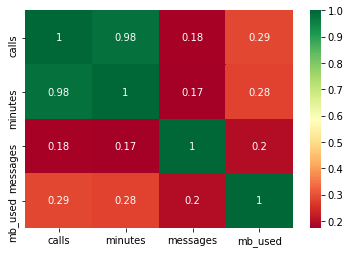

In [56]:
sns.heatmap(df[['calls', 'minutes', 'messages', 'mb_used']].corr(), cmap='RdYlGn', annot=True)
plt.show()

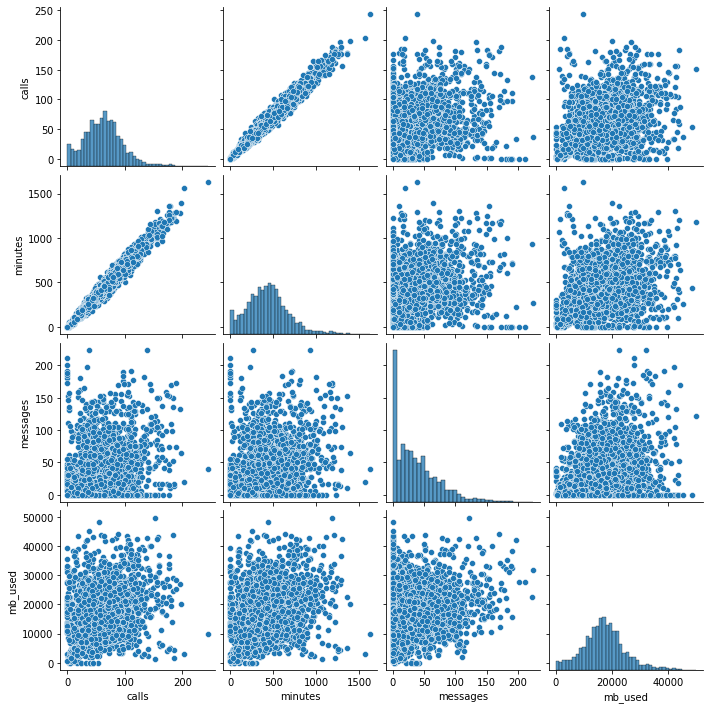

In [57]:
sns.pairplot(df[['calls', 'minutes', 'messages', 'mb_used']])
plt.show()

Мультиколлениарность обнаружилась в двух признаках - 'calls' и 'minutes'. В создании модели рекомендаций тарифного плана, потребуется только количество минут, звонков,  смс и объем трафика. Число звонков не принципиально, так как нет данных по длительности каждого звонка. Признак 'calls' можно удалить из датафрейма:

In [58]:
df = df.drop('calls', axis=1)
df.head()

,minutes,messages,mb_used,is_ultra
0,311.90,83.0,19915.42,0
1,516.75,56.0,22696.96,0
2,467.66,86.0,21060.45,0
3,745.53,81.0,8437.39,1
4,418.74,1.0,14502.75,0


Посмотрим на матрицу, после устранения признака 'calls':

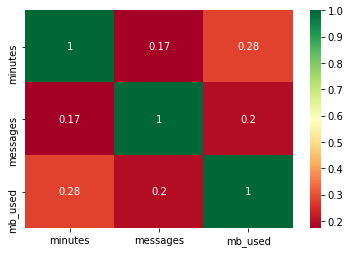

In [59]:
sns.heatmap(df[['minutes', 'messages', 'mb_used']].corr(), cmap='RdYlGn', annot=True)
plt.show()

После устранения мультиколлениарности, приступим к делению данных на выборки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  

Хорошее начало проекта!👍
 
***
    
Есть желание, на этом этапе можно дополнить свое исследование так:
- Критично посмотреть на данные с точки зрения наличия пропусков в признаках
- Явно обозначить какую задачу будем решать: с учителем / без учителя, классификации / регрессии и тд
- Проверить соотношение классов. В моделях бинарной классификации имеет смысл смотреть на баланс классов. Два взгляда (с разных сторон) на эту проблему тут: https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/ и https://habr.com/ru/post/349078/
- Построить и визуализировать матрицу корреляции признаков. При высокой их степени скоррелированности возникает проблема  мультиколлиниарности признаков. 
- Написать вывод
    
PS - В раках данного проекта эти пункты не требуются, это несколько моментов "на будущее" :)
    
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
    
1. Рекомендую посмотреть на данные с помощью функции `describe()` для поиска инсайтов
    
2. Добавить краткий вывод к разделу
     
</div>

<div class="alert alert-success">
<b>✔️ Коментарий ревьюера №2:</b> 
   
Молодец, что подробно проработал этап знакомства с данными, очень хорошая практика  🔥
    
У тебя получилась наглядная матрица корреляции, хорошо, что применяешь тепловую карту и зафиксировал факт мультиколлениарности 👍

</div>

<div class="alert alert-info">
<b>Комментарий ревьюера №2:</b>

    
В рамках данного проекта достаточно просто обозначить факт высокой корреляции между признаками. Удалять признаки не обязательно, т.к. датасет учебный, данных мало, метрика может снизиться. 
    
Но в будущем можно попробовать бороться с мультиколлинеарностью:
    
- Удалить по одному признаку из пары.
- Преобразовать признаки.
- Использовать регуляризацию.
    
*** 
    
 - Короткая статья о разных тестах и решениях: https://www.codetd.com/ru/article/12820846
 - Более подробная статья: https://habr.com/ru/company/akbarsdigital/blog/592493/
 - Про Лассо и Ридж: https://www.machinelearningmastery.ru/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b/, https://datascience.eu/ru/машинное-обучение/регрессия-лассо-простое-определение/    
    
   
</div>

## Разбейте данные на выборки

Создадим функцию, которая разделит  датафрейм на обучающую, тестовую и валидационную выборки. По данным из нескольких источников по распределение долей, деление будет таким: обучающая выборка - 60% данных, валидационная - 20%, тестовая - 20% данных. Такое соотношение считается оптимальным, нет риска переобучения модели.

In [60]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=123):  #создадим функцию разделениея датасета на выборки
    np.random.seed(seed)                                 # вводим генератор случайных чисел
    perm = np.random.permutation(df.index)               # подключаем функцию исключения повторов для чистоты расчетов
    m = len(df.index)                                    # считаем количество элементов датафрейма
    train_end = int(train_percent * m)                   #определяем обучающую выборку
    validate_end = int(validate_percent * m) + train_end  #определяем валидационную и тестовую выборку
    train = df.iloc[perm[:train_end]]                    # Структурируем обучающую выборку
    validate = df.iloc[perm[train_end:validate_end]]     # структурируем валидационную выборку
    test = df.iloc[perm[validate_end:]]                  # структурируем тестовую выборку
    return train, validate, test                         # возвращаем результаты работы функции по выборкам

In [61]:
df_train, df_validate, df_test = train_validate_test_split(df)

In [62]:
df_train.shape[0]

1928

In [63]:
df_validate.shape[0]

642

In [64]:
df_test.shape[0]

644

Получили три выборки:

          -обучающая - 1928 объектов;
          -валидационная - 642 объекта;
          -тестовая - 644 объекта.
Создадим переменные, в котортых содержатся признаки для модели и целевые признаки.

In [65]:
#признаки модели на обучающей выборке
features_train = df_train.drop('is_ultra', axis=1)
#целевой признак
target_train = df_train['is_ultra']

#признаки модели на валидационной выборке
features_valid = df_validate.drop('is_ultra', axis=1)
#целевой признак
target_valid = df_validate['is_ultra']

#признаки модели на тестовой выборке
features_test = df_test.drop('is_ultra', axis=1)
#целевой признак
target_test = df_test['is_ultra']

<div class="alert alert-info"> <b>Доработка</b></div>

In [66]:
features_train.shape[0]

1928

In [67]:
target_train.shape[0]

1928

In [68]:
features_valid.shape[0]

642

In [69]:
target_valid.shape[0]

642

In [70]:
features_test.shape[0]

644

In [71]:
target_test.shape[0]

644

<div class="alert alert-success">
<b>Комментарий ревьюера: </b>

Основательный подход к делению на выборки 🔥 

</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
    
После разбиения рекомендую воспользоваться методом `.shape` и вывести размеры выборок (признаки, целевая переменная)
    
</div>

<div class="alert alert-success">
<b>✔️ Коментарий ревьюера №2:</b> 
   
👍

</div>

## Исследуйте модели

Из условия, перед нами стоит задача бинарной классификации(0 или 1). Будем рассматривать три модели решения.

- решающее дерево
- случайный лес
- логистическая регрессия

  <strong>Решающее дерево</strong>

В целях получения наибольшего значения accuracy на валидационной выборке, будем вручную менять гиперпараметры модели:

- max_depth - максимальная глубина дерева (будем рассматривать от 1 до 5, так как при глубине более 5 модель обычно переобучена)
- criterion - критерий (Джини или энтропийный)
- min_samples_split - минимальное количество объектов, необходимое для разделения внутреннего узла (от 2 до 5)
- min_samples_leaf - минимальное количество объектов в листе (от 1 до 5)

In [72]:
best_model_tree = None
best_result_tree = 0
for depth in range(1, 6):
    for criterion in ['gini', 'entropy']:
        for split in range(2, 6):
            for leaf in range(1, 6):
                model_tree = DecisionTreeClassifier(random_state=1234, max_depth=depth, criterion=criterion, \
                                                    min_samples_split=split, min_samples_leaf=leaf)
                model_tree.fit(features_train, target_train)
                predictions_tree = model_tree.predict(features_valid) 
                result_tree = accuracy_score(target_valid, predictions_tree).round(3)
                if result_tree > best_result_tree:
                    best_model_tree = model_tree
                    best_result_tree = result_tree
                 
print('Accuracy лучшей модели на валидационной выборке:', best_result_tree) 
print('Параметры лучшей модели:', best_model_tree)

Accuracy лучшей модели на валидационной выборке: 0.769
Параметры лучшей модели: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1234)


Получили значение accuracy равное 0,769 на валидационной выборке при следующих гиперпараметрах решающего дерева:

- max_depth = 5
- criterion = entropy
- min_samples_split = 2
- min_samples_leaf = 1

<strong>Случайный лес</strong>

Рассмотрим следующую модель - случайный лес. Будем менять количество деревьев (n_estimators) от 1 до 5. Чем больше деревьев в модели, тем выше точность, но падает скорость работы.

In [73]:
best_model_forest = None
best_result_forest = 0
for est in range(1, 6):
    model_forest = RandomForestClassifier(random_state=1234, n_estimators=est) 
    model_forest.fit(features_train, target_train)
    predictions_forest = model_forest.predict(features_valid) 
    result_forest = accuracy_score(target_valid, predictions_forest).round(3)
    if result_forest > best_result_forest:
        best_model_forest = model_forest 
        best_result_forest = result_forest
        
print('Accuracy лучшей модели на валидационной выборке:', best_result_forest) 
print('Параметры лучшей модели:', best_model_forest)

Accuracy лучшей модели на валидационной выборке: 0.752
Параметры лучшей модели: RandomForestClassifier(n_estimators=4, random_state=1234)


Получили значение accuracy равное 0,752 на валидационной выборке при количестве деревьев равном 5.

<strong>Логистическая регрессия</strong>

Используем логистическую регрессию:

In [74]:
model_regress = LogisticRegression(random_state=1234, class_weight=None, solver='lbfgs') 
model_regress.fit(features_train, target_train) 
predictions_regress = model_regress.predict(features_valid)
result_regress = accuracy_score(target_valid, predictions_regress).round(3)

print("Accuracy модели логистической регрессии на валидационной выборке:", result_regress)
print('Параметры лучшей модели:', model_regress)

Accuracy модели логистической регрессии на валидационной выборке: 0.707
Параметры лучшей модели: LogisticRegression(random_state=1234)


Для логистической регрессии мы получили самое низкое значение accuracy на валидационной выборке, равное 0,707.

Теперь проверим все три модели (с подобранными гиперпараметрами) на тестовой выборке.

<div class="alert alert-info"> <b>Доработка</b></div>

Итак, сделаем короткую выборку по моделям и посмотрим на параметры лучшей:

In [84]:
data = {'validate':[best_result_tree, best_result_forest, result_regress],}
table = pd.DataFrame(data)
table.index = ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия']
table

,validate
Решающее дерево,0.769
Случайный лес,0.752
Логистическая регрессия,0.707


Параметры лучшей модели: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1234)

Вывод: лучшие результаты, показала модель Решающее дерево, с количеством деревьев по гиперпараметру, равное 5ти. Это говорит о том, что "средняя температура по больнице", наиболее объективный взгляд на ситуацию

<div class="alert alert-success">
<b>Комментарий ревьюера: </b>

Молодец, что ты оптимизируешь код и добавляешь в цикл условие для вывода Accuracy и гиперпараметров лучшей модели 🔥
    
И отдельно хочется похвалить, что используешь больше одного гиперпараметра 👍    
 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 
  
После этого этапа стоит добавить вывод:
    
- Результаты по всем моделям 
- Определить лучшую, ее метрику и гиперпараметры

</div>

<div class="alert alert-success">
<b>✔️ Коментарий ревьюера №2:</b> 
   
Очень наглядное решение вывести общую информацию по метрикам всех моделей 👍

</div>

<div class="alert alert-info"> <b>Комментарий ревьюера:</b> 
    
**Полезные материалы:**
    
Для подбора оптимальных параметров можно использовать функции Gridsearchcv или Randomizedsearchcv. 
    
1. Статья про разницу между ними: 
    https://towardsdatascience.com/gridsearchcv-or-randomsearchcv-5aa4acf5348c#:~:text=RandomSearchCV%20has%20the%20same%20purpose,parameters%20to%20improve%20your%20model.&text=The%20main%20difference%20between%20the,want%20to%20sample%20and%20test. 
    
2. И просто очень большая статья по их применению: 
    https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/ 
    
3. Совсем обьемная статья с огромным количеством библиотек для подбора гиперпараметров:
    https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide/. 
    
4. Ускоренная версия GridsearchCV 
    https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c.    
    
</div>

## Проверьте модель на тестовой выборке

<strong>Решающее дерево</strong>

In [75]:
predictions_test_tree = best_model_tree.predict(features_test) 
result_test_tree = accuracy_score(target_test, predictions_test_tree).round(3)
print('Accuracy модели на тестовой выборке', result_test_tree)

Accuracy модели на тестовой выборке 0.795


<strong>Случайны лес</strong>

In [76]:
predictions_test_forest = best_model_forest.predict(features_test) 
result_test_forest = accuracy_score(target_test, predictions_test_forest).round(3) 
print('Accuracy модели на тестовой выборке', result_test_forest)

Accuracy модели на тестовой выборке 0.783


<strong>Логистическая регрессия</strong>

In [77]:
predictions_test_regress = model_regress.predict(features_test)
result_test_regress = accuracy_score(target_test, predictions_test_regress).round(3)
print('Accuracy модели на тестовой выборке', result_test_regress)

Accuracy модели на тестовой выборке 0.75


In [78]:
data = {'validate':[best_result_tree, best_result_forest, result_regress], 'test':[result_test_tree, 
                                                                                   result_test_forest,
                                                                                   result_test_regress]}
table = pd.DataFrame(data)
table.index = ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия']
table

,validate,test
Решающее дерево,0.769,0.795
Случайный лес,0.752,0.783
Логистическая регрессия,0.707,0.750


Лучший результат показывает решающее дерево (accuracy на тестовой выборке 0,795), случайный лес немного уступает (0,783). Логистическая регрессия показала наихудший результат (0,750).

In [79]:
table['delta'] = table['test']-table['validate']
display(table['delta'].to_frame())

,delta
Решающее дерево,0.026
Случайный лес,0.031
Логистическая регрессия,0.043


На тестовой выборке подтверждается хорошая работа моделей. Посмотрев на дельту, можно сделать вывод что модель"Случайны лес" имеет наименьшее расхождение результатов. Как выяснилось, такая дельта - свидетельство предсказуемости модели. Неисключено, что нужна более тонкая настройка гиперпараметров.

<div class="alert alert-success">
<b>Комментарий ревьюера: </b>

Здорово, что ты выводишь общую информацию по всем моделям в одну таблицу, очень наглядно 👍 
    
Но на тестовой выборке исследуют одну модель, которую определили на этапе ранее.    
 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 
    
Таблицу с результатами метрик всех моделей как раз стоит сделать на этапе выше (Исследование модели), сравнить и определить какая лучшая.
И при проверке на тестовой выборке использовать одну модель
    
</div>

## (бонус) Проверьте модели на адекватность

Для проверки модели на адекватность нужно сравнить модель со случайной. Создадим столбец, случайным образом заполняемый нулями и единицами:

In [80]:
df_test['is_ultra_rand'] = np.random.randint(2, size=df_test.shape[0])
df_test['is_ultra_rand'].value_counts()

/tmp/ipykernel_31/3044401495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['is_ultra_rand'] = np.random.randint(2, size=df_test.shape[0])


0    333
1    311
Name: is_ultra_rand, dtype: int64

In [81]:
df_test.head()

,minutes,messages,mb_used,is_ultra,is_ultra_rand
2967,583.37,58.0,20898.57,1,0
869,482.18,40.0,11178.07,1,1
3159,200.09,102.0,27432.25,1,1
1978,350.29,6.0,22870.78,0,0
873,556.84,71.0,19869.21,0,0


Создадим переменные с целевым признаком (target_one) и "предсказаниями" случайной модели (predict_rand):

In [82]:
target_one = df_test['is_ultra']
predict_rand = df_test['is_ultra_rand']

In [83]:
result_test_check = accuracy_score(target_one, predict_rand).round(3)
print('Accuracy случайной модели:', result_test_check)

Accuracy случайной модели: 0.474


Вывод: accuracy случайной модели получилась примерно 0,47 (верояность почти 50/50). Accuracy всех наших моделей выше точности случайной модели. Это говорит об адекватности обученных моделей. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Молодец, что дополнил исследование и проверяешь модель на адекватность   🔥     
    
</div>

<div class="alert alert-info"> <b>Комментарий ревьюера:</b> 
    
**Полезные материалы:**
    
Рекомендую ознакомиться с <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html">Dummy Models</a> для более удобной и функциональной проверки на адекватность.

***
    
Мы используем простейшую (dummy) модель DummyClassifier (она подходит для текущей задачи бинарной классификации). 
DummyClassifier "предсказывает" наиболее часто встречающийся класс. Здесь мы получаем контрольную accuracy, чтобы сравнить её с результатом работы самой лучшей модели. Наша лучшая модель должна "побить" DummyClassifier :)
    
p.s. (на перспективу!): можно было бы построить Confusion Matrix, чтобы детально посмотреть, где ошибается модель. Подробнее о Confusion Matrix: https://neptune.ai/blog/evaluation-metrics-binary-classification 
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> 

Добавь, пожалуйста, общий вывод =)

</div>

<div class="alert alert-success">
<b>✔️ Заключительный комментарий ревьюера:</b> 
    
Алексей, спасибо за проделанную работу! 
    
У тебя получился хороший проект, видно, что ты разбираешься в теме исследования 🔥

    
***    
 
Есть несколько общих моментов для улучшения:   
- Написать оформление проекта своими словами (цели, задачи  + итоги исследования)
- Вывести размеры получившихся выборок`
- Добавить выводы по разделам + итоговое резюме проекта.
    
PS - еще рекомендую таблицу с результатами метрик всех моделей сделать на этапе исследования моделей. Определить лучшую и посмотреть результаты на тестовой выборке.
    
***

Возвращаю тебе работу, чтобы ты смог внести правки в проект и задать вопросы)
    
Успехов!

</div>

<h2>Вывод:</h2>

 Итак, в нашем распоряжении были тестовые данные и целевой признак, на базе которых мы провели эксперименты на трех моделях. Наилучший результат показала модель "решающее дерево" с результатом:

In [87]:
data = {'validate':[best_result_tree], 'test':[result_test_tree]}
table = pd.DataFrame(data)
table.index = ['Решающее дерево']
table

,validate,test
Решающее дерево,0.769,0.795


Это говорит о том, что для подобного типа данных и глобально задачи регрессии, мы имеем точку отсчета в проведении дальнейших исследований по созданию корректной системы машинного обучения. Модель была опробована на случайных данных и доказала, что обучение прошло успешно.

In [89]:
print('Accuracy случайной модели:', result_test_check)

Accuracy случайной модели: 0.474


В результате, поставленная в усовии задача была выполненна!

<div class="alert alert-success">
<b>✔️ Коментарий ревьюера №2:</b> 
   
Отличное резюме проекта  🔥

</div>

<div class="alert alert-success">
<b>✔️ Заключительный комментарий ревьюера №2:</b> 
    
Алексей, спасибо за внесение правок! 
    
У тебя хороший проект, видно, что интересуешься областью.
    
Желаю тебе удачи в учебе и дальнейших проектах!    

</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
